In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# write data
data = pd.read_csv('Credit_risk.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
# checking the missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# checking the modes for later missing value imputation
print(data.Gender.mode)
print(data.Married.mode)
print(data.Self_Employed.mode)

<bound method Series.mode of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
<bound method Series.mode of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
<bound method Series.mode of 0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object>


In [6]:
# deleting the column, because it gives no information
del data['Loan_ID']

#impute numerical missing values
def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)
mean = data.LoanAmount.mean()
mean1 = data.Loan_Amount_Term.mean()
mean2 = data.Credit_History.mean()

data['LoanAmount'] = impute_na(data, 'LoanAmount', mean)
data['Loan_Amount_Term'] = impute_na(data, 'Loan_Amount_Term', mean1)
data['Credit_History'] = impute_na(data, 'Credit_History', mean2)
data['Dependents'] = data['Dependents'].fillna(0)

In [7]:
# impute categorical missing values
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Self_Employed'] = data['Self_Employed'].fillna('No')

Text(0.5, 1.0, 'Gender')

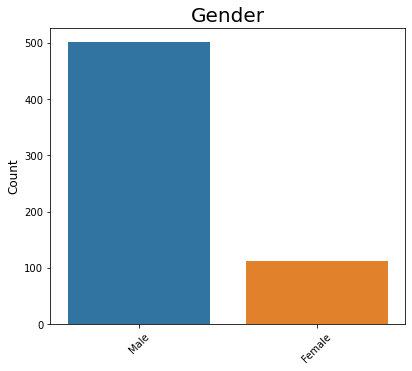

In [8]:
# plotting graph according to gender
plt.figure(figsize = (14,12))
plt.subplot(221)
g = sns.countplot(x="Gender", data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Gender", fontsize=20)

Text(0.5, 1.0, 'Education')

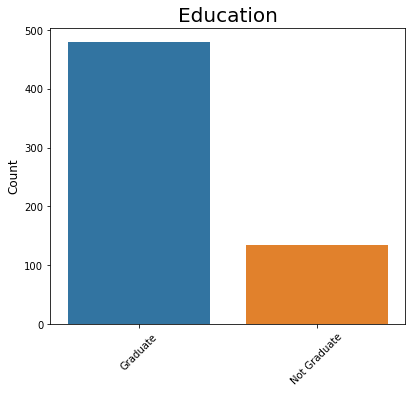

In [9]:
# plotting graph according to education
plt.figure(figsize = (14,12))
plt.subplot(221)
g = sns.countplot(x="Education", data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Education", fontsize=20)

It can be seen from the above graphs that the data is imbalanced. 

In [10]:
# checking the correlation
data.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [11]:
# choosing only numerical columns
numeric_data = data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']]
numeric_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


General information about the numerical data can be seen from above.

In [12]:
# encoding categorical data
labelencoder = LabelEncoder()
data['Property_Area'] = labelencoder.fit_transform(data['Property_Area'])
data['Gender'] = pd.get_dummies(data['Gender'])
data['Married'] = pd.get_dummies(data['Married'])
data['Education'] = pd.get_dummies(data['Education'])
data['Self_Employed'] = pd.get_dummies(data['Self_Employed'])
data['Loan_Status'] = pd.get_dummies(data['Loan_Status'])

In [13]:
#splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Loan_Status'], axis=1),
    data['Loan_Status'],
    test_size=0.3,
    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((429, 11), (429,), (185, 11), (185,))

In [14]:
#linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual  Predicted
454       0   0.241490
52        1   0.238525
536       0   0.227912
469       1   0.167435
55        0   0.127771
62        1   1.048303
539       0   0.129294
432       0   0.285617
367       1   0.966039
482       0   0.206478
Mean Absolute Error: 0.3024671498786509
Mean Squared Error: 0.1438328519554043
Root Mean Squared Error: 0.37925301838667586


In [15]:
#Random Forest
def ranFor(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train:')
    pred = rf.predict_proba(X_train)
    print('Random Forest: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test:')
    pred = rf.predict_proba(X_test)
    print('Random Forest: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print(classification_report(y_test, rf.predict(X_test)))
ranFor(X_train,X_test, y_train, y_test)

Train:
Random Forest: 0.9091558313632782
Test:
Random Forest: 0.7800702370500439
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       134
           1       0.91      0.41      0.57        51

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [16]:
#logistic regression
def log(X_train, X_test, y_train, y_test):
    logit = LogisticRegression(random_state = 44, max_iter = 500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print(classification_report(y_test, logit.predict(X_test)))

scaler = StandardScaler().fit(X_train)

log(scaler.transform(X_train),scaler.transform(X_test), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7804866036249015
Test set
Logistic Regression roc-auc: 0.73441615452151
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       134
           1       0.88      0.45      0.60        51

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [17]:
#XGBClassifier
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)
    print('                   ', name, '\n', classification_report(y_test, model.predict(X_test)))
   

#XGB
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

[21:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Zaur\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


                    XGBoost 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       134
           1       0.68      0.59      0.63        51

    accuracy                           0.81       185
   macro avg       0.77      0.74      0.75       185
weighted avg       0.80      0.81      0.81       185



C:\Users\Zaur\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [18]:
#KNeighbors
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train')
print('The KNeighbors score: {}'.format(knn.score(X_train, y_train)))
print('Test')
print('The KNeighbors score: {}'.format(knn.score(X_test, y_test)))
print('\n')
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print('\n')
print(classification_report(y_test, y_pred))

Train
The KNeighbors score: 0.7435897435897436
Test
The KNeighbors score: 0.6270270270270271


Predicted    0   1  All
Actual                 
0          104  30  134
1           39  12   51
All        143  42  185


              precision    recall  f1-score   support

           0       0.73      0.78      0.75       134
           1       0.29      0.24      0.26        51

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.63      0.62       185



In [19]:
#DecisionTree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The DecisionTree score: {}'.format(metrics.roc_auc_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The DecisionTree score: 0.6975417032484635
[[116  18]
 [ 24  27]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.60      0.53      0.56        51

    accuracy                           0.77       185
   macro avg       0.71      0.70      0.70       185
weighted avg       0.77      0.77      0.77       185



In [20]:
#AdaBosst
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("The AdaBoost score:",metrics.accuracy_score(y_test, y_pred))

The AdaBoost score: 0.8


From above scores, the models can be listed from the weakest to the strongest as:
Linear Regression;
Decision Tree;
KNeighbors;
XGBoost;
Logistic Regression;
AdaBoost;
Random Forest. 

It should be mentioned that for the KNeigbors algorithm as the number of nodes changes, the score value also changes.
The weakest model is Linear Regression whereas the strongest is Random Forest. 